In [51]:
%pip install opencv-python tensorflow kagglehub

In [2]:
import kagglehub

path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:08<00:00, 55.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [41]:
import os
for folder in os.listdir(path):
    print(folder, ":", os.listdir(os.path.join(path, folder))[:5])


DATASET : ['TRAIN', 'TEST']
dataset : ['DATASET']


In [42]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
import tensorflow as tf

In [43]:
from glob import glob
import cv2
from cv2 import cvtColor, imread, COLOR_BGR2RGB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm


In [44]:
train_path=f'{path}/DATASET/TRAIN'
test_path=f'{path}/DATASET/TEST'

In [45]:
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = imread(file)
        img_array = cvtColor(img_array, COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data = pd.DataFrame({'image': x_data, 'label': y_data})


100%|██████████| 9999/9999 [00:08<00:00, 1216.73it/s]


In [46]:
data.shape

(22564, 2)

In [47]:
data.head()

,image,label
0,"[[[160, 81, 51], [160, 81, 51], [161, 82, 52],...",O
1,"[[[222, 249, 242], [227, 250, 244], [243, 255,...",O
2,"[[[90, 89, 87], [90, 89, 87], [88, 87, 85], [8...",O
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",O
4,"[[[61, 61, 61], [59, 59, 59], [60, 60, 60], [6...",O


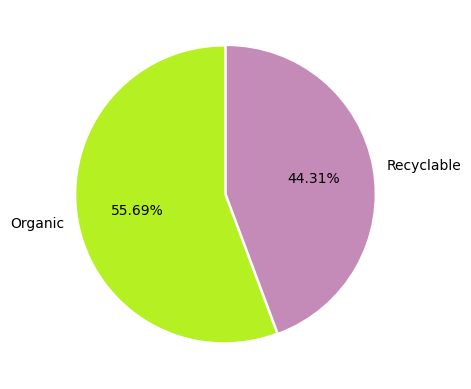

In [48]:
colors = ['#ae0d', '#c48bb8']
plt.pie(data.label.value_counts(),
        labels=['Organic', 'Recyclable'],
        autopct='%0.2f%%',
        colors=colors,
        startangle=90,
        explode=[0.009, 0.009])
plt.show()

In [74]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))
batch_size = 256

In [75]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_24 (Activation)           │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_25 (Activation)           │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_26 (Activation)           │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_27 (Activation)           │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_28 (Activation)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_29 (Activation)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [78]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [79]:
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 57s 595ms/step - accuracy: 0.6653 - loss: 0.6231 - val_accuracy: 0.8731 - val_loss: 0.3676
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 563ms/step - accuracy: 0.8065 - loss: 0.4547 - val_accuracy: 0.8723 - val_loss: 0.3514
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 569ms/step - accuracy: 0.8269 - loss: 0.4140 - val_accuracy: 0.8918 - val_loss: 0.3331
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 575ms/step - accuracy: 0.8296 - loss: 0.4031 - val_accuracy: 0.8886 - val_loss: 0.3277
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 52s 578ms/step - accuracy: 0.8398 - loss: 0.3885 - val_accuracy: 0.8850 - val_loss: 0.3237
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 82s 577ms/step - accuracy: 0.8466 - loss: 0.3735 - val_accuracy: 0.8894 - val_loss: 0.2951
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 568ms/step - accuracy: 0.8588 - loss: 0.3465 - val_accuracy: 0.8902 - val_loss: 0.2884
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 573ms/step - accuracy: 0.8664 - loss: 0.3297 - val_accu

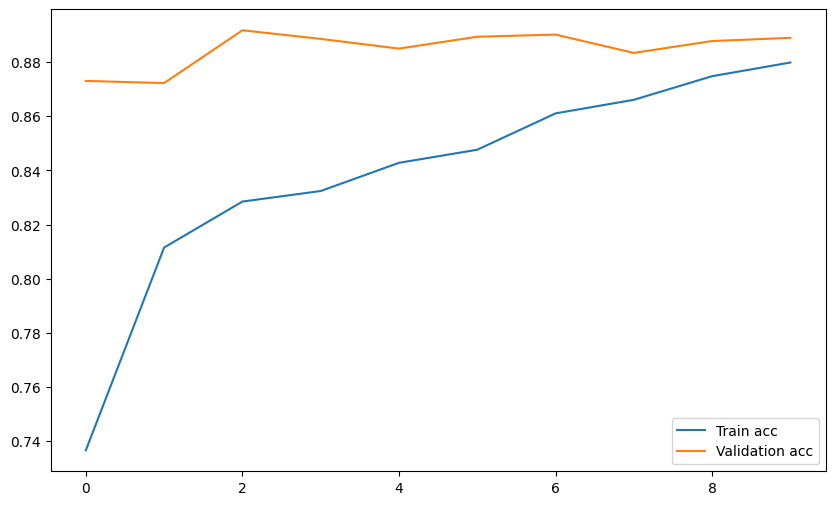

In [80]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

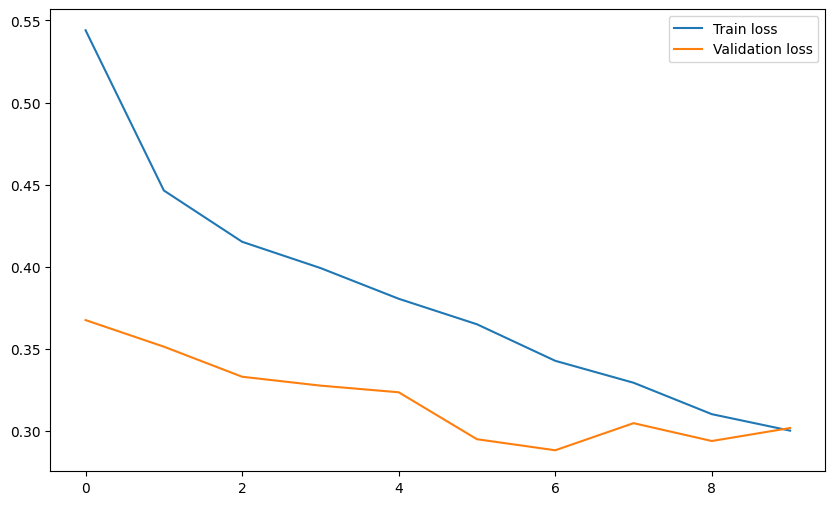

In [81]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [102]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(ensemble_model.predict(img))
    if result == 0: print("This image shows recyclable waste")
    elif result ==1: print("This image shows organic waste")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
This image shows organic waste


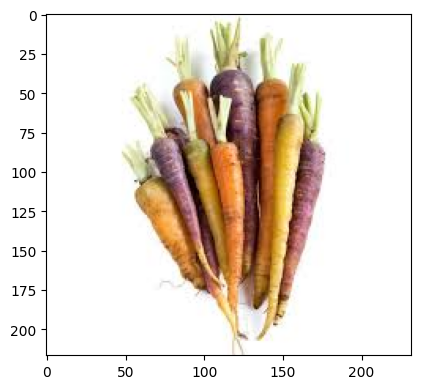

In [104]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/O/O_12574.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
This image shows recyclable waste


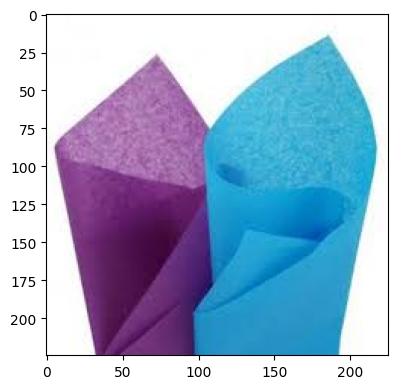

In [105]:
test_img = cv2.imread("/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)

In [85]:
model.save("waste_classification_model_2.h5")  # Saves in HDF5 format

In [107]:
# Load trained models
model1 = tf.keras.models.load_model("/content/waste_classification_model_2.h5")
model2 = tf.keras.models.load_model("/content/waste_classification_model_3.h5")
model3 = tf.keras.models.load_model("/content/waste_classification_model_5.h5")

# Define Ensemble Model
class EnsembleModel(tf.keras.Model):
    def __init__(self, models):
        super(EnsembleModel, self).__init__()
        self.models = models

    def call(self, inputs):
        predictions = [model(inputs, training=False) for model in self.models]
        return tf.reduce_mean(predictions, axis=0)

ensemble_model = EnsembleModel([model1, model2, model3])
ensemble_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
ensemble_model.evaluate(np.zeros((1, 224, 224, 3)), np.zeros((1,)), verbose=0)
ensemble_model.save("ensemble_waste_classifier.h5")

print("✅ Ensemble Model Saved Successfully!")


✅ Ensemble Model Saved Successfully!
